In [202]:
#importing relevant modules
#importing relevant modules!
import scipy.io 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

In [203]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


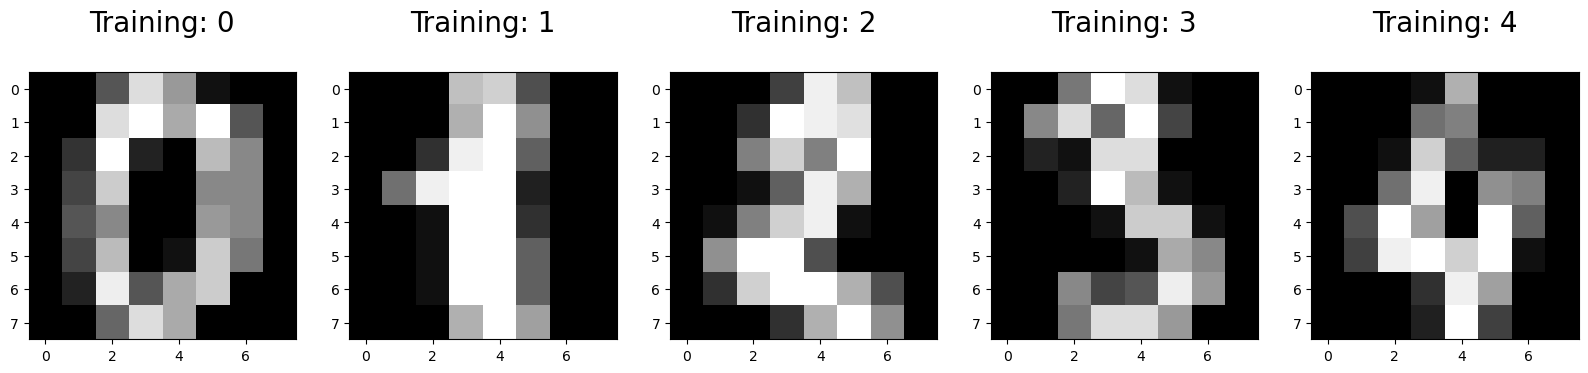

In [204]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [205]:
from sklearn.model_selection import train_test_split
#load dataset
X_digits, y_digits = load_digits(return_X_y = True)

r= 4   

X_train, X_rem, y_train, y_rem = train_test_split(X_digits, y_digits, train_size=0.80, random_state=r)    

#first I split the dataset into train and test data, then passed through rem to test developement
# basically train = 80%, dev = 10%, test = 10%
test_size = 0.5
X_dev, X_test, y_dev, y_test = train_test_split(X_rem, y_rem, test_size = 0.5)

print(X_train.shape), print(y_train.shape)
print(X_dev.shape), print(y_dev.shape)
print(X_test.shape), print(y_test.shape)

(1437, 64)
(1437,)
(180, 64)
(180,)
(180, 64)
(180,)


(None, None)

In [206]:
#Random forest approach with default hyperparameters
#importing necessary library and defining classifier
from sklearn.ensemble import RandomForestClassifier

In [207]:
clf = RandomForestClassifier(bootstrap=True, 
                       criterion='gini',max_depth=None,max_features='auto', 
                       max_leaf_nodes=None,min_impurity_decrease = 1e-07, min_samples_leaf=1, 
                       min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=10,
                       n_jobs=1,oob_score=False,random_state=None,verbose=0, warm_start=False) 
                       

In [208]:
model_1 = clf.fit(X_train,y_train)

In [209]:
#trained model above can now be used to make predictions on new data
from sklearn.metrics import accuracy_score

preds = model_1.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.9333333333333333


98% accurate model of hand written numbers at Max_depth = 2 (changed from Max_depth = None). 
If the number of splits is too low for the Max_depth parameter, the model underfits the data/too high and it overfits. Generally, 3, 5, or 7 are chosen, with this dataset the parameter of 2 had the highest percentage of accuracy and so I specified this value. 


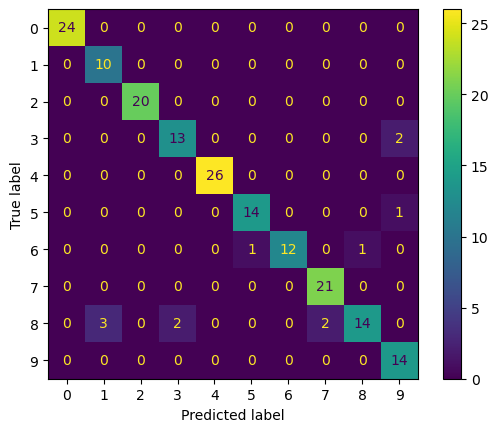

In [210]:
# Visualise Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, preds)

def plot_cm(cm):
    ConfusionMatrixDisplay(cm).plot()
    
plot_cm(cm)

- Report which classes the model struggles with the most. 
The class that the model struggles with the most is determined by counting the total number of incorrect predictions per label. For example, labels 9, 7, 6, 4 & 1 has one incorrect prediction, however label 5 has 3.

The F1 score is a combination of precision and recall and is represented in a single metric. The F1 score reaches its best value at 1 and the worst score at 0.

In [215]:
import sklearn
from sklearn.metrics import precision_score, recall_score
sklearn.metrics.precision_recall_fscore_support(y_test, preds)


print("Precision Score : ",precision_score(y_test, preds, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, preds, 
                                           pos_label='positive',
                                           average='micro'))

print("f1 score : ",f1_score(y_test, preds, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.9333333333333333
Recall Score :  0.9333333333333333
f1 score :  0.9333333333333333


C:\Users\sfocacci\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sfocacci\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\sfocacci\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1437, 180]